In [1]:
from sklearn.datasets import fetch_openml

# 데이터 살펴보기

In [5]:
mnist = fetch_openml('mnist_784')
## 시간 오래걸리니, 되도록이면 누르지 말 것!

# 손글씨 데이터. 784개의 column으로 이루어져 있다.
# 28픽셀 * 28픽셀 데이터로 784개 칼럼임

In [17]:
print(f'key 값 : {mnist.keys()}')
print(f'target shape 값 : {mnist.target.shape}')
print(f'target 값 : {mnist.target}')
# print(f'value count 값 : {mnist.data.value_counts()}')
print(f'mnist min 값 : {mnist.data.min().min()}')
print(f'mnist min 값 : {mnist.data.max().max()}')
# min - max 확인 : 최소 0 ~ 최대 256 -> 8비트 색상임을 알 수 있음

key 값 : dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])
target shape 값 : (70000,)
target 값 : 0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']
mnist min 값 : 0.0
mnist min 값 : 255.0


# 데이터 살펴보기 : 시각화

'7'

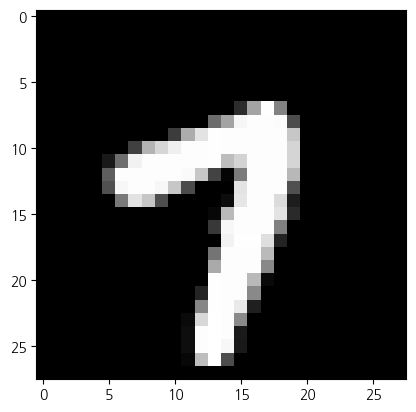

In [46]:
import matplotlib.pyplot as plt
import numpy as np

n = 12

tmp = X_test.iloc[n]
tmp = np.array(tmp)
tmp = tmp.reshape(28, 28)

plt.imshow(tmp, cmap='gray') # 학습데이터 이미지 보기
y_test.iloc[n] # 학습데이터 정답 보기

In [47]:
# 이를 행렬데이터로 살펴보면?

tmp

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

# 머신러닝 : 데이터셋 나누기

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [19]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.1)

In [20]:
# 데이터셋 나눠진 개수 확인
y_train.value_counts()

1    7078
7    6515
3    6411
9    6310
2    6238
0    6224
8    6192
6    6185
4    6130
5    5717
Name: class, dtype: int64

# 머신러닝 : 학습 및 예측

In [24]:
# 분류기
clf = RandomForestClassifier()

# 학습
clf.fit(X_train, y_train)

# 예측
pred = clf.predict(X_test)

# 정확도 평가
accuracy_score(y_test, pred)

0.9687142857142857

# 실제 손글씨 인식

In [48]:
import glob
from PIL import Image

In [65]:
# 예측

pred_list = []

for path in glob.glob('./img/*.bmp'):
    # print(path)
    img = Image.open(path).convert('L') # L : 흑백 / L 삭제하면 기본값인 RGB로 표현됨
    # print(img)
    # plt.imshow(img, cmap='gray')
    
    img = np.resize(img, (1, 784))      # 1, 784 형태의 array로 바꿈
    img = 255.0 - (img)                   # 색상 반전
    
    pred = clf.predict(img)
    print(pred)
    
    pred_list.append(pred)
    
    print(img)
    plt.show()

['0']
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 255. 255. 255.
  255. 255. 255. 255.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0. 255. 255. 255.   0.   0.
    0.   0.   0. 255. 255. 255.   0.   0.   0.   0.   0.  

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: Us

In [64]:
# 정답률

answer = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
print('정답률 : ', str(accuracy_score(pred_list, answer) * 100) + '%')

정답률 :  60.0%


## 정답률이 낮다. 왜?

* 머신러닝의 경우는.. 특정 위치의 값을 학습하는 것이므로  
* 글자의 모양 뿐만 아니라, 값의 존재 위치 (글씨가 어디서 시작해서 어디로 그려지느냐) 또한 매우 중요하다.  
* 이러한 손글씨는 딥러닝 쪽에서 많은 발전을 하고 있다.  